In [1]:
!pip install --quiet transformers
!pip install --quiet albumentations
!pip install --quiet torchmetrics
!pip install --quiet paddleocr>=2.0.1 paddlepaddle
!pip install --quiet opencv-python-headless==4.5.3.56
#!pip install ocrspace (tried not good)

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cmip6-preprocessing 0.6.0 requires pint-xarray, which is not installed.
intake-esm 2021.8.17 requires h5netcdf>=0.8.1, but you have h5netcdf 0.0.0 which is incompatible.
google-api-core 2.10.1 requires protobuf<5.0.0dev,>=3.20.1, but you have protobuf 3.20.0 which is incompatible.
cmip6-preprocessing 0.6.0 requires xgcm<0.7.0, but you have xgcm 0.8.0 which is incompatible.


In [1]:
%%time
## STANDARD LIBRARY AND PIPELINE MODULES IMPORT
import warnings
warnings.filterwarnings("ignore")
from pipeline import segmentation
from pipeline import correct_perspective
# from pipeline import text_detection
# from pipeline import OCR
from pipeline import classifier
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

CPU times: user 3.19 s, sys: 1.32 s, total: 4.51 s
Wall time: 4.18 s


In [5]:
from paddleocr import PaddleOCR as padocr
DEVICE = "cpu"#"cuda" if torch.cuda.is_available() else "cpu"

# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr1 = padocr(lang='en', use_gpu=(DEVICE=="gpu"), det_db_box_thresh=0.6, drop_score = 0.6) # need to run only once to download and load model into memory
del ocr1
def get_text(crop_img, det=False, rec=False):
    return ocr1.ocr(crop_img, det=det)

[2023/02/04 15:21:11] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/jovyan/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/jovyan/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_pa

In [6]:
%%time
## EVALUATION ON EACH IMAGE
TEST_IMG_DIR = "test_data"
imlis = os.listdir(TEST_IMG_DIR)
imloc = f"{TEST_IMG_DIR}/{imlis[17]}"

image = cv2.cvtColor(cv2.imread(imloc), cv2.COLOR_BGR2RGB)
mask = segmentation.maskPred(image)
# print(mask)
(detector_io, class_io) =  correct_perspective.correctPerspective(image, mask)
label = classifier.classification(class_io) 
# result =  OCR.get_text(detector_io, det=True)
# for idx in range(len(result)):
# bounding_boxes = text_detection.get_boxes(class_io)

# print(bounding_boxes)


# bounding_boxes1 = list(np.expand_dims(np.round(np.array(bounding_boxes)).astype(np.int32), 2))

# fig, ax = plt.subplots(len(bounding_boxes) + 1, 2, figsize = (40, 200))

# croplis = []
# texlis = []

# for idx in range(len(bounding_boxes)):
#     img = cv2.cvtColor(class_io, cv2.COLOR_BGR2GRAY)
#     # mask = np.zeros_like(img) # Create mask where white is what we want, black otherwise
#     # cv2.drawContours(mask, bounding_boxes1, idx, 255, -1) # Draw filled contour in mask
#     # out = np.zeros_like(img) # Extract out the object and place into output image
#     # out[mask == 255] = img[mask == 255]
    
#     # ax[idx][0].imshow(out)
#     # print(bounding_boxes[idx][0])
#     text, crop = OCR.trOCR(class_io, bounding_boxes[idx])
    
#     # ax[idx][1].imshow(crop)
#     # ax[idx][1].set_xlabel(f"{text}, {len(text)}")
    
#     croplis.append(crop)
#     texlis.append(text)
    
# # ax[-1][0].imshow(image)
# # ax[-1][1].imshow(class_io)

# # fig, ax = plt.subplots(len(bounding_boxes) + 1)

# # for idx,bounding_box in enumerate(bounding_boxes):
# #     text, crop = OCR.trOCR(detector_io, bounding_box)

# #     print(text)
# #     ax[idx].imshow(crop)
# # ax[-1].imshow(monitor)

CPU times: user 4.03 s, sys: 262 ms, total: 4.29 s
Wall time: 1.63 s


In [72]:
print(label)

1


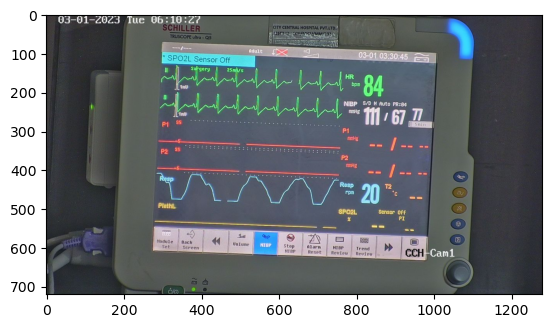

In [81]:
plt.imshow(image)

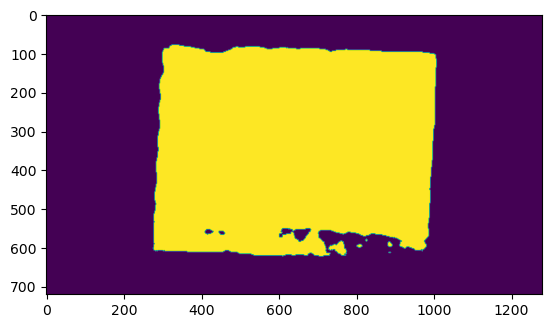

In [82]:
plt.imshow(mask)

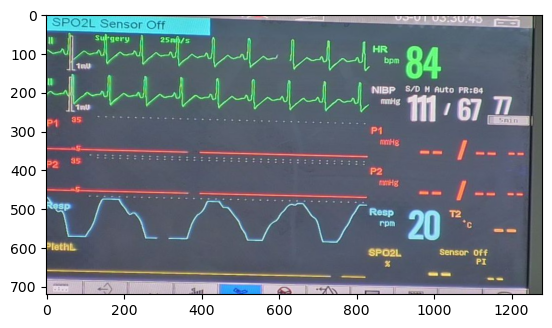

In [83]:
plt.imshow(detector_io)

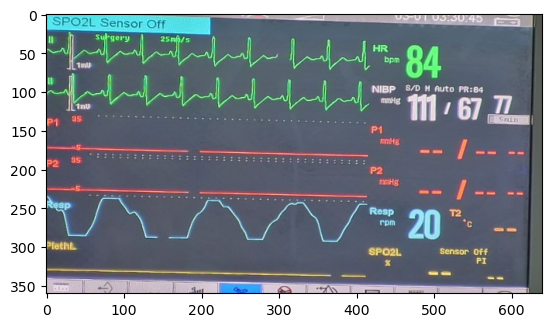

In [84]:
plt.imshow(class_io)

In [141]:
%%time
# img_path = 'class.jpg'
x = cv2.resize(class_io, (320, 180))
result = get_text(class_io, det=True)
result = result[0]
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

[2023/02/04 14:55:59] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/02/04 14:55:59] ppocr DEBUG: dt_boxes num : 21, elapse : 0.13704323768615723
[2023/02/04 14:56:01] ppocr DEBUG: rec_res num  : 21, elapse : 1.6316051483154297
[[5.0, 3.0], [154.0, 8.0], [154.0, 23.0], [5.0, 17.0]]
('SPO2L Sensor Off', 0.9362890124320984)
[[465.0, 1.0], [567.0, 1.0], [567.0, 14.0], [465.0, 14.0]]
('-0103:30:45', 0.9477390050888062)
[[460.0, 41.0], [511.0, 41.0], [511.0, 84.0], [460.0, 84.0]]
('84', 0.9999634027481079)
[[429.0, 53.0], [459.0, 48.0], [462.0, 69.0], [432.0, 73.0]]
('bpm', 0.9859078526496887)
[[421.0, 92.0], [451.0, 92.0], [451.0, 103.0], [421.0, 103.0]]
('NIBP', 0.9843937754631042)
[[462.0, 89.0], [565.0, 91.0], [565.0, 105.0], [462.0, 103.0]]
('S/D M AUto PR:84', 0.9055483341217041)
[[434.0, 108.0], [457.0, 108.0], [457.0, 117.0], [434.0, 117.0]]
('nmHg', 0.8581446409225464)
[[469.0, 102.0], [565.0, 107

In [122]:
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]

[[[[[28.0, 18.0], [121.0, 11.0], [126.0, 89.0], [33.0, 96.0]],
   ('111', 0.9976716637611389)],
  [[[310.0, 15.0], [333.0, 15.0], [333.0, 22.0], [310.0, 22.0]],
   ('sp02', 0.5266591906547546)],
  [[[344.0, 12.0], [445.0, 12.0], [445.0, 102.0], [344.0, 102.0]],
   ('95', 0.9986422061920166)],
  [[[273.0, 35.0], [292.0, 35.0], [292.0, 42.0], [273.0, 42.0]],
   ('IAUE', 0.6210206747055054)],
  [[[522.0, 53.0], [556.0, 53.0], [556.0, 69.0], [522.0, 69.0]],
   ('6.60', 0.9292173385620117)],
  [[[314.0, 117.0], [344.0, 117.0], [344.0, 124.0], [314.0, 124.0]],
   ('Pietn', 0.6226817965507507)],
  [[[2.0, 168.0], [17.0, 168.0], [17.0, 176.0], [2.0, 176.0]],
   ('BP', 0.7670519351959229)],
  [[[45.0, 167.0], [74.0, 167.0], [74.0, 177.0], [45.0, 177.0]],
   ('05105', 0.7475723028182983)],
  [[[116.0, 166.0], [143.0, 166.0], [143.0, 176.0], [116.0, 176.0]],
   ('2142', 0.7562175989151001)],
  [[[305.0, 161.0], [334.0, 164.0], [333.0, 174.0], [304.0, 172.0]],
   ('Resp', 0.9524774551391602)],
  [

In [123]:
bounding_boxes1 = list(np.expand_dims(np.round(np.array(boxes)).astype(np.int32), 2))

# fig, ax = plt.subplots(len(bounding_boxes) + 1, 2, figsize = (40, 200))

# # croplis = []
# # texlis = []

# for idx in range(len(boxes)):
#     img = cv2.cvtColor(class_io, cv2.COLOR_BGR2GRAY)
#     mask = np.zeros_like(img) # Create mask where white is what we want, black otherwise
#     cv2.drawContours(mask, bounding_boxes1, idx, 255, -1) # Draw filled contour in mask
#     out = np.zeros_like(img) # Extract out the object and place into output image
#     out[mask == 255] = img[mask == 255]
    
#     # ax[idx][0].imshow(out)
#     # print(bounding_boxes[idx][0])
#     # text, crop = OCR.trOCR(class_io, bounding_boxes[idx])
    
#     ax[idx][1].imshow(crop)
#     ax[idx][1].set_xlabel(f"{text}, {len(text)}")
    
#     croplis.append(crop)
#     texlis.append(text)
    
# # ax[-1][0].imshow(image)
# # ax[-1][1].imshow(class_io)

In [49]:
bounding_boxes1

[array([[[ 28,  18]],
 
        [[121,  11]],
 
        [[126,  89]],
 
        [[ 33,  96]]], dtype=int32),
 array([[[310,  15]],
 
        [[333,  15]],
 
        [[333,  22]],
 
        [[310,  22]]], dtype=int32),
 array([[[344,  12]],
 
        [[445,  12]],
 
        [[445, 102]],
 
        [[344, 102]]], dtype=int32),
 array([[[273,  35]],
 
        [[292,  35]],
 
        [[292,  42]],
 
        [[273,  42]]], dtype=int32),
 array([[[522,  53]],
 
        [[556,  53]],
 
        [[556,  69]],
 
        [[522,  69]]], dtype=int32),
 array([[[314, 117]],
 
        [[344, 117]],
 
        [[344, 124]],
 
        [[314, 124]]], dtype=int32),
 array([[[  2, 168]],
 
        [[ 17, 168]],
 
        [[ 17, 176]],
 
        [[  2, 176]]], dtype=int32),
 array([[[ 45, 167]],
 
        [[ 74, 167]],
 
        [[ 74, 177]],
 
        [[ 45, 177]]], dtype=int32),
 array([[[116, 166]],
 
        [[143, 166]],
 
        [[143, 176]],
 
        [[116, 176]]], dtype=int32),
 array([[[305, 161]

In [56]:
len(boxes)

22

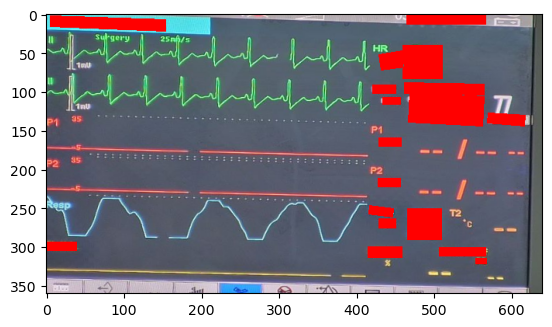

In [124]:
plt.imshow(cv2.drawContours(class_io, bounding_boxes1, -1, 255, -1)) # Draw filled contour in mask

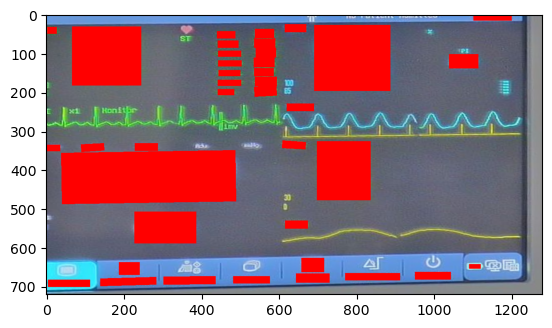

In [62]:
plt.imshow(cv2.drawContours(detector_io, bounding_boxes1, -1, 255, -1)) # Draw filled contour in mask

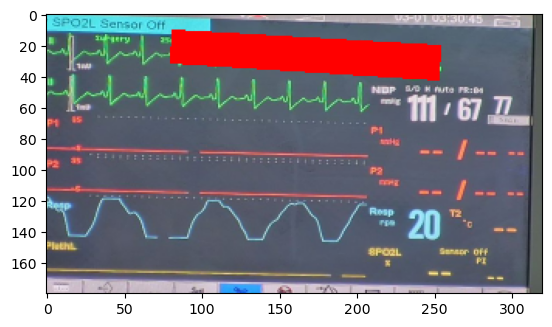

In [94]:
plt.imshow(cv2.drawContours(x, bounding_boxes1, -1, 255, -1)) # Draw filled contour in mask

In [91]:
plt.imshow(cv2.drawContours(x, bounding_boxes1, -1, 255, -1)) # Draw filled contour in mask

NameError: name 'bounding_boxes1' is not defined

In [6]:
ocr1

NameError: name 'ocr1' is not defined